In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [19]:
plt.rc('font', size=12)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [26]:
evaluation_datasets = [
    "MIXED-3",
    "D3RLPY-MP4-P0_20000",
    "D3RLPY-MP4-P1_20000",
    "D3RLPY-MP4-P2_20000",
    "D3RLPY-MP4-P3_20000",
    "D3RLPY-MP4-P4_20000",
    "D3RLPY-MP4-P0_100000",
    "D3RLPY-MP4-P1_100000",
    "D3RLPY-MP4-P2_100000",
    "D3RLPY-MP4-P3_100000",
    "D3RLPY-MP4-P4_100000",
    "D3RLPY-MP5-P0_20000",
    "D3RLPY-MP5-P1_20000",
    "D3RLPY-MP5-P2_20000",
    "D3RLPY-MP5-P3_20000",
    "D3RLPY-MP5-P4_20000",
    "D3RLPY-MP5-P0_100000",
    "D3RLPY-MP5-P1_100000",
    "D3RLPY-MP5-P2_100000",
    "D3RLPY-MP5-P3_100000",
    "D3RLPY-MP5-P4_100000",
    "D3RLPY-MP6-P0_20000",
    "D3RLPY-MP6-P1_20000",
    "D3RLPY-MP6-P2_20000",
    "D3RLPY-MP6-P3_20000",
    "D3RLPY-MP6-P4_20000",
    "D3RLPY-MP6-P0_100000",
    "D3RLPY-MP6-P1_100000",
    "D3RLPY-MP6-P2_100000",
    "D3RLPY-MP6-P3_100000",
    "D3RLPY-MP6-P4_100000",
    "D3RLPY-PAP8-P0_20000",
    "D3RLPY-PAP8-P1_20000",
    "D3RLPY-PAP8-P2_20000",
    "D3RLPY-PAP8-P3_20000",
    "D3RLPY-PAP8-P4_20000",
    "D3RLPY-PAP8-P0_100000",
    "D3RLPY-PAP8-P1_100000",
    "D3RLPY-PAP8-P2_100000",
    "D3RLPY-PAP8-P3_100000",
    "D3RLPY-PAP8-P4_100000",
    "D3RLPY-PAP9-P0_20000",
    "D3RLPY-PAP9-P1_20000",
    "D3RLPY-PAP9-P2_20000",
    "D3RLPY-PAP9-P3_20000",
    "D3RLPY-PAP9-P4_20000",
    "D3RLPY-PAP9-P0_100000",
    "D3RLPY-PAP9-P1_100000",
    "D3RLPY-PAP9-P2_100000",
    "D3RLPY-PAP9-P3_100000",
    "D3RLPY-PAP9-P4_100000",
    "D3RLPY-PAP10-P0_20000",
    "D3RLPY-PAP10-P1_20000",
    "D3RLPY-PAP10-P2_20000",
    "D3RLPY-PAP10-P3_20000",
    "D3RLPY-PAP10-P4_20000",
    "D3RLPY-PAP10-P0_100000",
    "D3RLPY-PAP10-P1_100000",
    "D3RLPY-PAP10-P2_100000",
    "D3RLPY-PAP10-P3_100000",
    "D3RLPY-PAP10-P4_100000",
    "RAND-1",
    "RAND-2",
    "RAND-3",
    "RAND-4",
    "RAND-5",
    "RAND-6",
    "RAND-7",
    "RAND-8",
    "RAND-9",
    "RAND-10",
]

training_datasets = [
    "RAND-2",
    "RAND-9",
    "D3RLPY-MP4-P4_20000",
    "D3RLPY-MP5-P1_20000",
    "D3RLPY-PAP9-P0_20000",
]

experiments_no_rex = ['MP329', 'MP330', 'MP331']
experiments_mse_01 = ['MP332', 'MP333', 'MP334']
experiments_mse_1  = ['MP335', 'MP336', 'MP337']
experiments_mse_10 = ['MP338', 'MP339', 'MP340']

labels = ['No REx', 'REx - Beta 0.1', 'REx - Beta 1.0', 'REx - Beta 10.0']

In [27]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_mse_01_df = get_scores_df(experiments_mse_01, evaluation_datasets)
scores_mse_1_df = get_scores_df(experiments_mse_1, evaluation_datasets)
scores_mse_10_df = get_scores_df(experiments_mse_10, evaluation_datasets)

In [28]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_mse_01_groups = (
    scores_mse_01_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_01_avgs_df = scores_mse_01_groups.mean().reset_index()
scores_mse_01_mins_df = scores_mse_01_groups.min().reset_index()
scores_mse_01_maxs_df = scores_mse_01_groups.max().reset_index()

scores_mse_1_groups = (
    scores_mse_1_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_1_avgs_df = scores_mse_1_groups.mean().reset_index()
scores_mse_1_mins_df = scores_mse_1_groups.min().reset_index()
scores_mse_1_maxs_df = scores_mse_1_groups.max().reset_index()

scores_mse_10_groups = (
    scores_mse_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_mse_10_avgs_df = scores_mse_10_groups.mean().reset_index()
scores_mse_10_mins_df = scores_mse_10_groups.min().reset_index()
scores_mse_10_maxs_df = scores_mse_10_groups.max().reset_index()

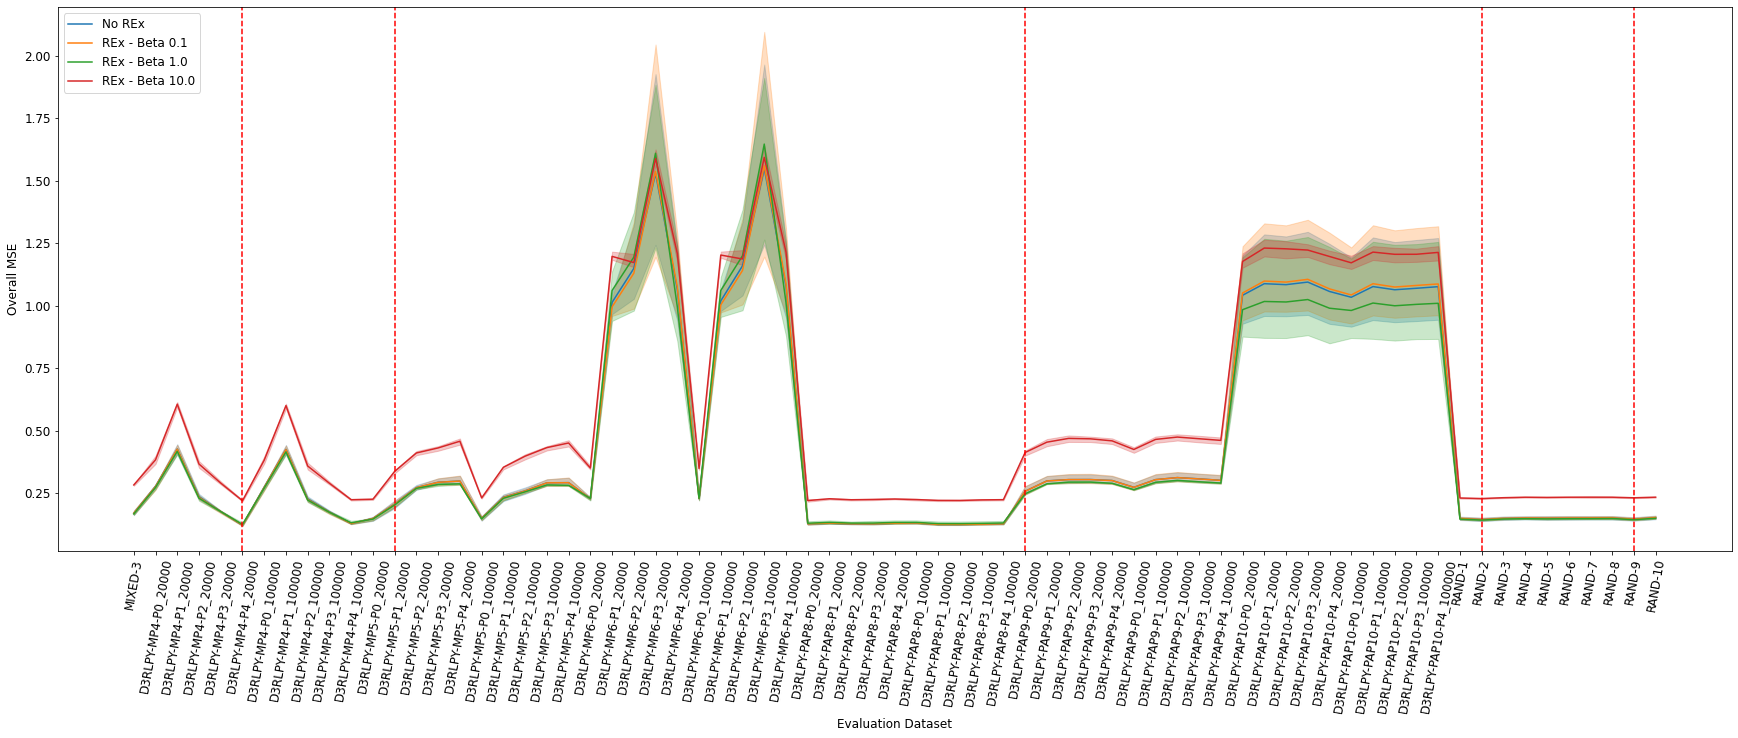

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

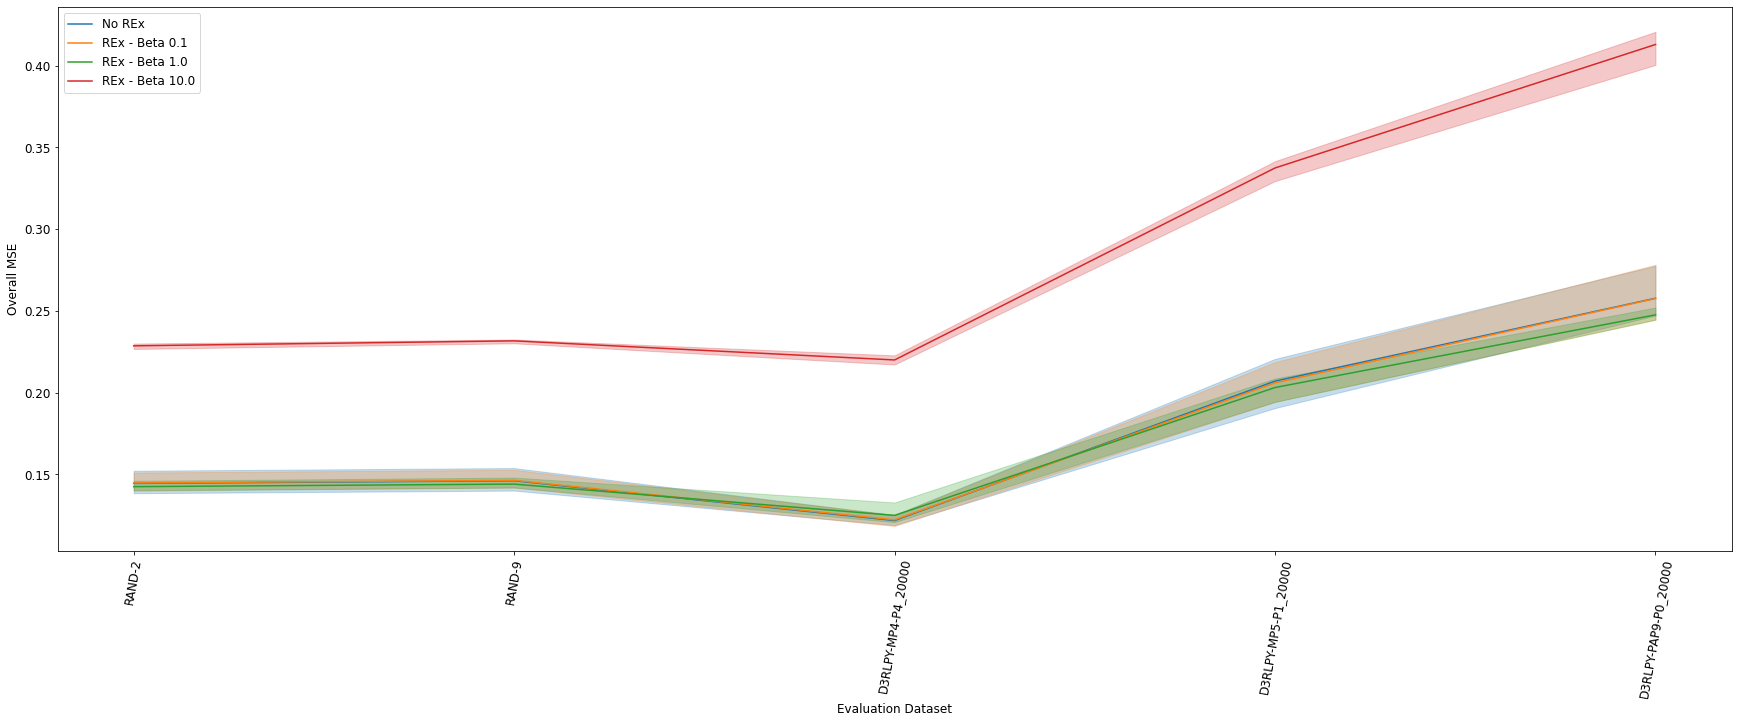

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

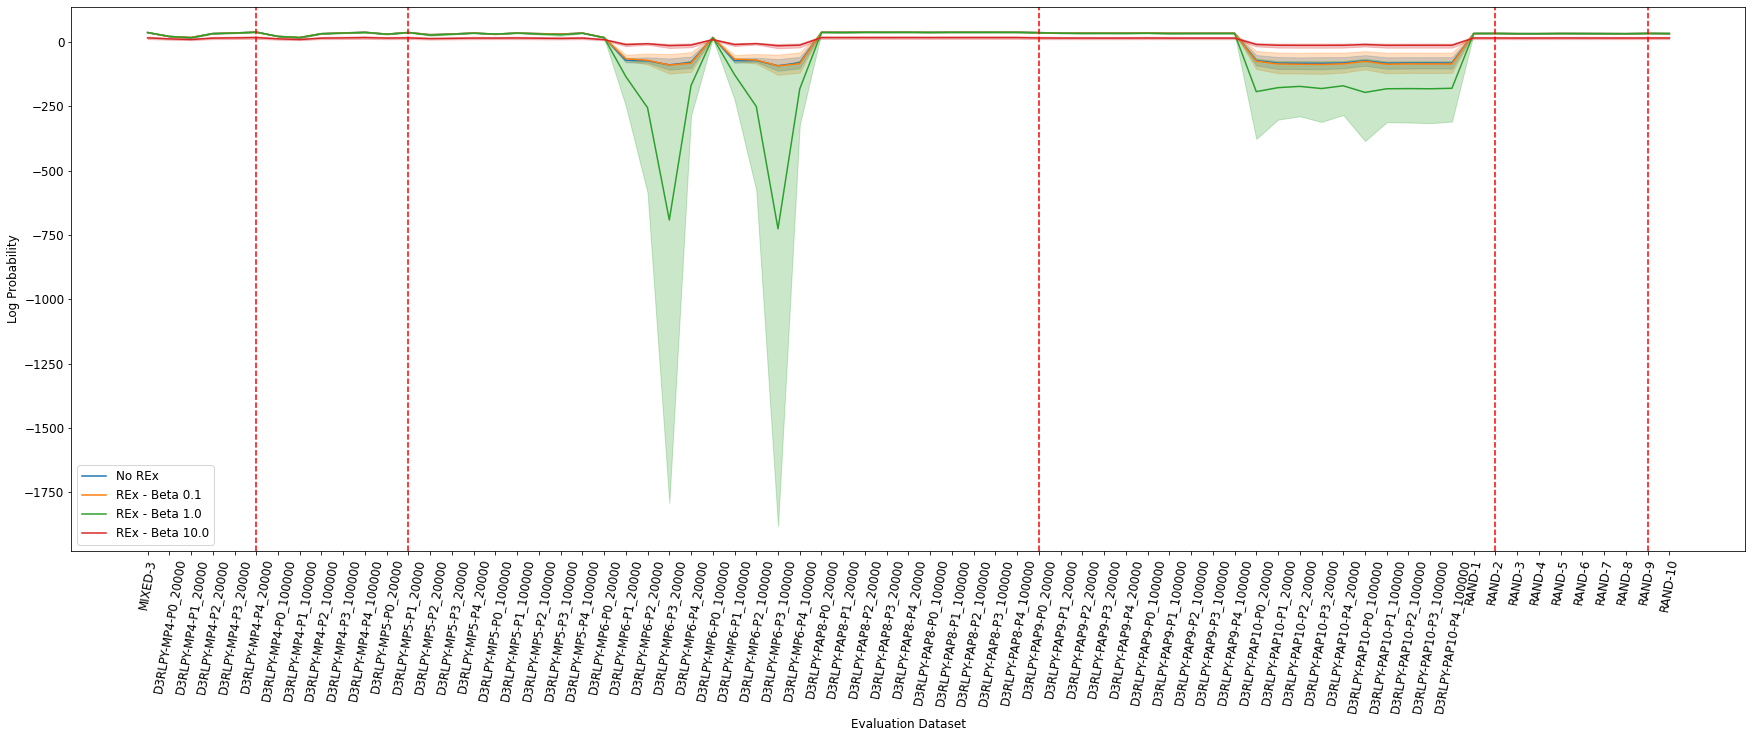

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

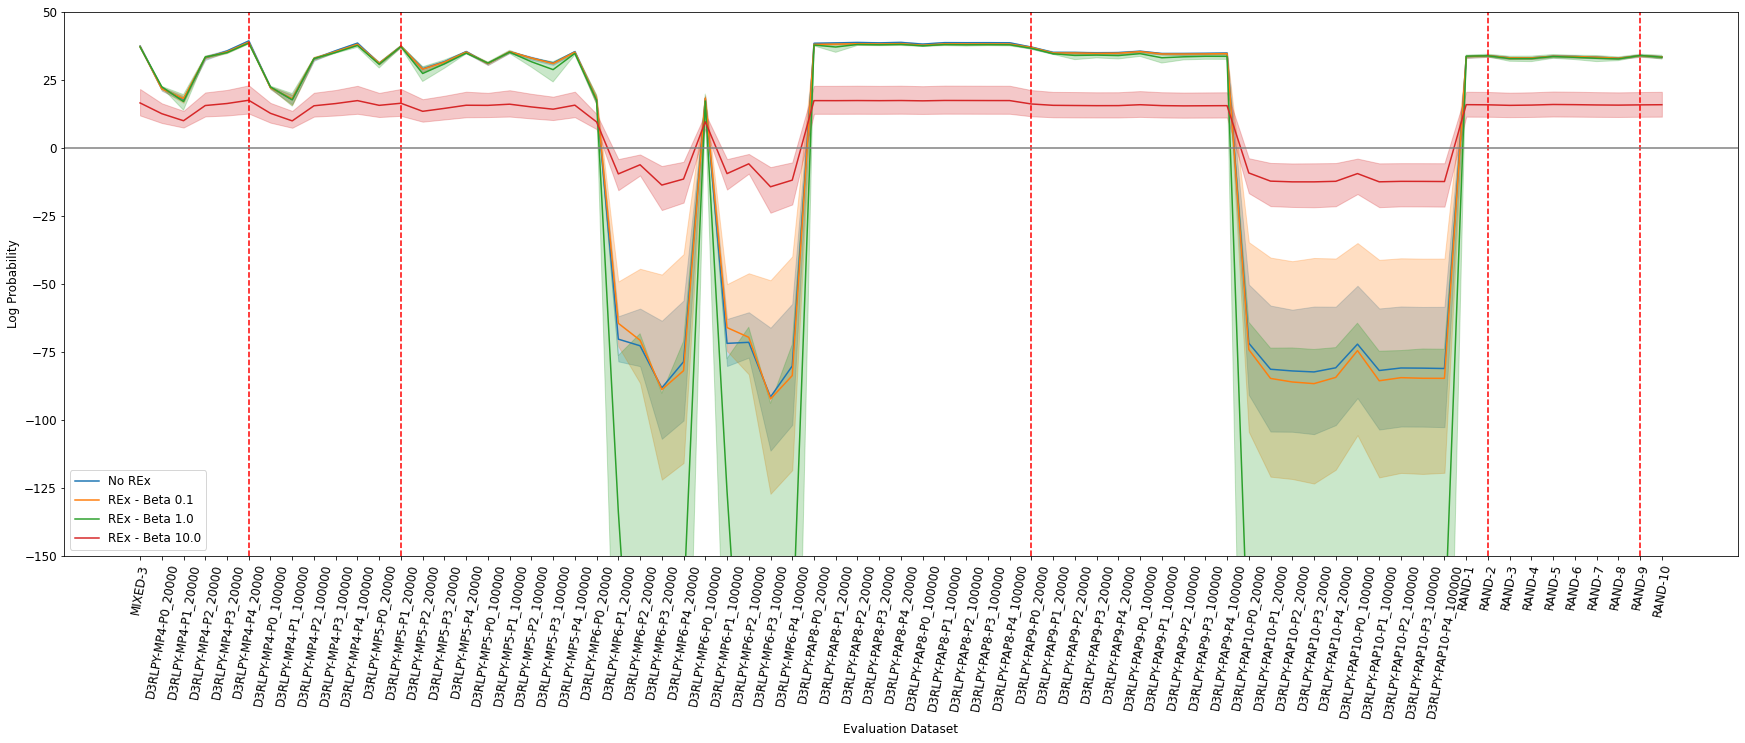

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for i in training_datasets:
    ax.axvline(i, ls='--', color='r')

ax.axhline(0, ls='-', color='gray')

ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-150.,50.)
ax.legend()

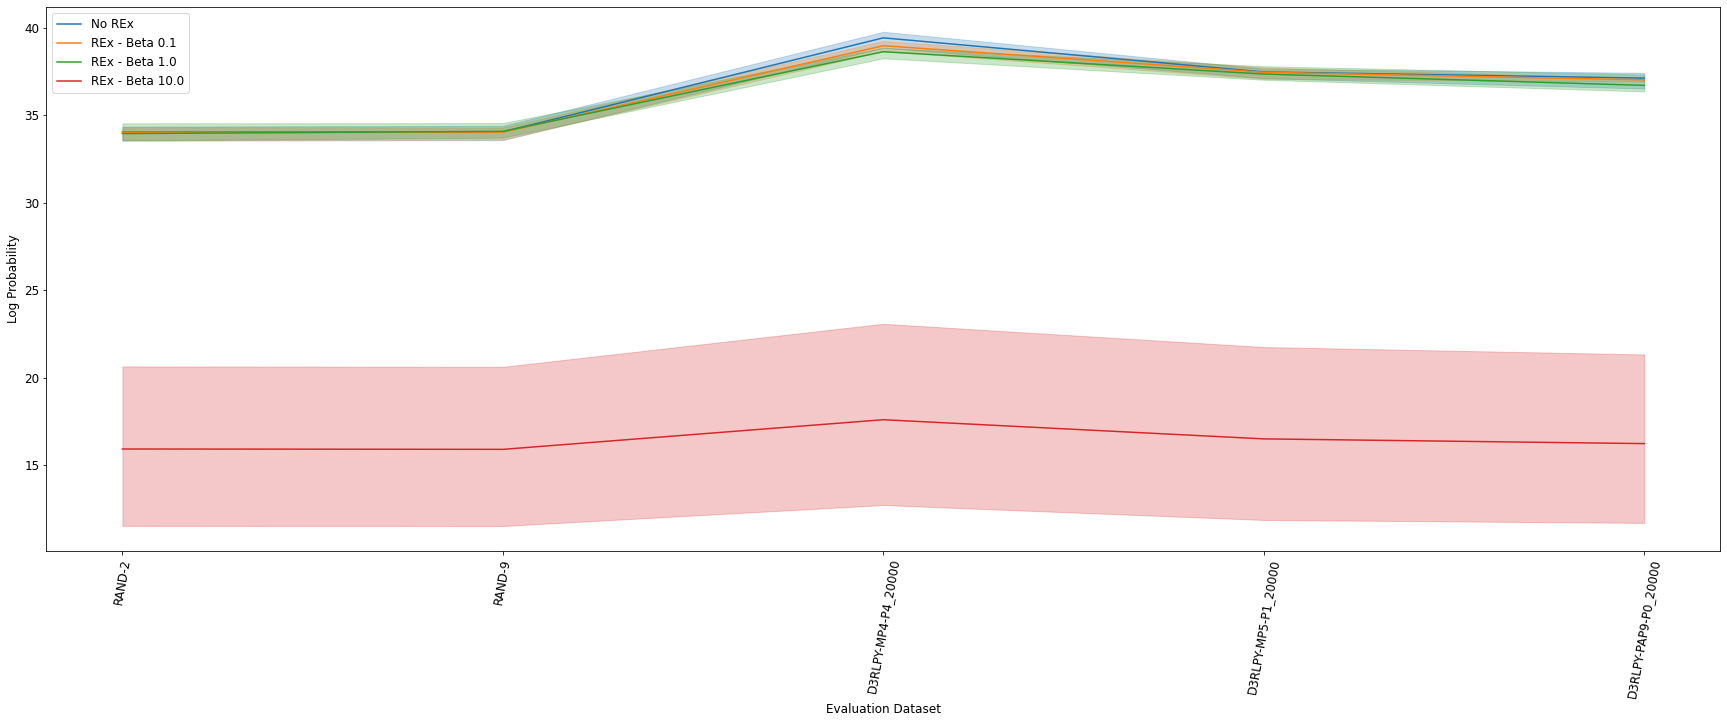

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_mse_01_avgs_df, scores_mse_01_mins_df, scores_mse_01_maxs_df), 
    (scores_mse_1_avgs_df, scores_mse_1_mins_df, scores_mse_1_maxs_df), 
    (scores_mse_10_avgs_df, scores_mse_10_mins_df, scores_mse_10_maxs_df), 
]): #, scores_mse_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
ax.set_xticks(ax.get_xticks(), training_datasets, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()